# Machine Learning

> "L'aprenentatge automàtic ("machine learning" en anglès) és un camp de la intel·ligència artificial que està dedicat al disseny, l'anàlisi i el desenvolupament d'algorismes i tècniques que permeten que les màquines evolucionin. Es una àrea multidisciplinària que, a través de ciències com la computació, les matemàtiques, la lògica i la filosofia, estudia la creació i el disseny de programes capaços de generalitzar comportaments a partir del reconeixement de patrons o classificació i de sistemes capaços de resoldre problemes quotidians per si mateixos, utilitzant com a paradigma la intel·ligència humana." [Link](https://ca.wikipedia.org/wiki/Aprenentatge_autom%C3%A0tic)


In [2]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

Cream un conjunt de dades sintètiques per poder fer l'entrenament.

In [3]:
data = np.random.rand(2500, 2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :]
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :]

label = (data[:, 0] > 0.5) & (data[:, 1] > 0.5).astype(np.uint8)

# Segona pràctica (ML): perceptró.

Aquesta primera pràctica veurem com es dur a terme un entrenament d'aprenentatge automàtic. Hem de dur a terme el procés que heu vist a teoria:

![proces](proces.png)

# Dataset 

El primer que hem de fer es saber com són les dades. Ja que són **dades 2D**. Per visualizar-ho empram la llibreria *matplotlib*.

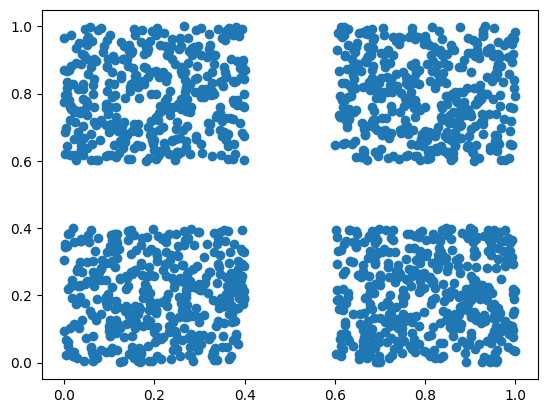

In [4]:
plt.scatter(data[:, 0], data[:, 1]);

Es interessant saber com es localitza l'etiqueta. Per fer-ho mostram cada punt a quina classe correspon.

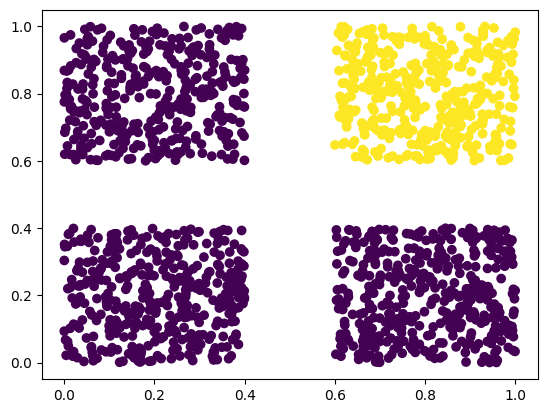

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label);

Em de dividir les dades entre train i test. Per fer-ho emprarem les eines que tenim amb la lliberia *scikit-learn*. Em de definir:
* La mida del test.
* Un random state. Ens permet que sempre es divideix igual.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.33, random_state=42
)

# Entrenament 

Entrenam un classificador, en particular un **Perceptró**. Un classificador és un model que ens permet fer prediccions binàries. Per entrenar-ho em de tenir en compte dues coses:
* Cada model té parametres que determinen com actuen.
* **Només em d'entrenar amb les dades d'entrenament**. 

In [7]:
clf = linear_model.Perceptron(tol=1e-9, random_state=42)
clf.fit(X_train, y_train);

Podem veure els paràmetres del model ($\theta$)que heu vist a teoria. En particular podem veure com defineix una divisió tot seguint la formula d'una recta:

$$ h_\theta(x) = \theta_0 \sum^n_{j=1} x_j \cdot \theta_j$$

In [8]:
print(f"Valor de bias: {clf.intercept_} - Valor dels pesos: {clf.coef_}")

Valor de bias: [-14.] - Valor dels pesos: [[10.04825127  9.66106542]]


## Predicció i performance

Podem visualitzar l'hiperplà que defineix el model. En aquest cas una recta. Per fer-ho empram la funció *plot* de *matplotlib*.

In [9]:
x_intercept = (0, (-clf.intercept_ / clf.coef_[0][1])[0])
y_intercept = ((-clf.intercept_ / clf.coef_[0][0])[0], 0)

pred = clf.predict(X_test)

Després pintam les dades, la seva predicció i la divisió.

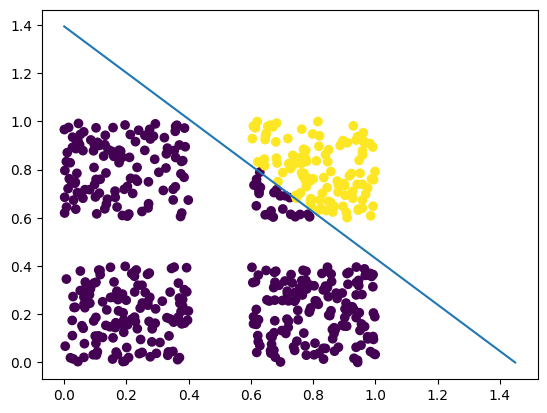

In [10]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.plot(x_intercept, y_intercept);

Obtenim les mètriques per saber si els resultats són millors o pitjors. Coneixem quatre mesures: *accuracy, recall, precision i F1-Score*. Podem emprar directament una eina que ho resumeix.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       386
           1       1.00      0.83      0.91       139

    accuracy                           0.96       525
   macro avg       0.97      0.92      0.94       525
weighted avg       0.96      0.96      0.95       525



# Pràctica

## Primeres dades

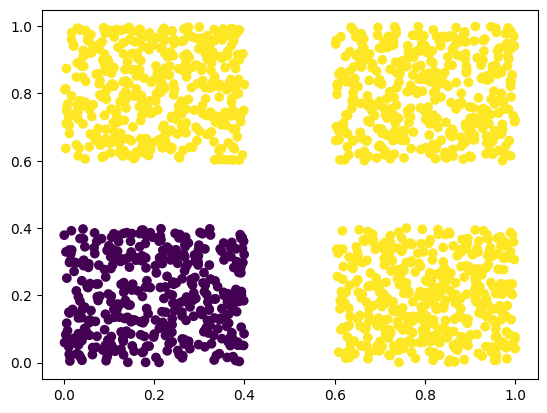

In [14]:
data = np.random.rand(2500, 2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :]
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :]

label = (data[:, 0] > 0.5) | (data[:, 1] > 0.5).astype(np.uint8)
plt.scatter(data[:, 0], data[:, 1], c=label);

**Activitat 1**

Donada la següent mostres de dades d'entrenament i un conjunt de dades de prova petit, entrena un model perceptró. Recorda que sempre s'ha de fer la divisió entre conjunt de validació i entrenament. Una vegada entrenat respon a les següent preguntes: 

- On classificaries cadascuna d'elles? Quina accuracy s'ha obtingut?
- Pinta també l'hiperplà que defineix el model.
- Obté les mètriques de validació.

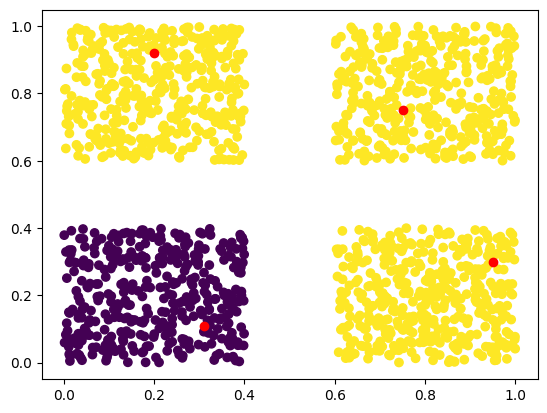

In [15]:
X_test = np.array([[0.75, 0.75],[0.95, 0.3],[0.2, 0.92],[0.31, 0.11]])
plt.scatter(data[:,0], data[:,1], c=label)
plt.scatter(X_test[:,0],X_test[:,1],c="red")

## Segones dades

Fer l'entrenament d'un nou model i pinta un altre pic l'hiperplà. Que passa?

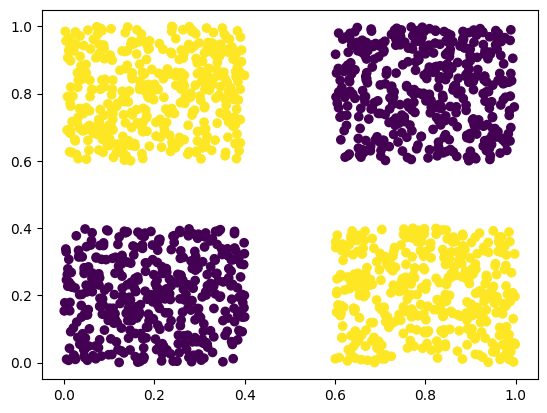

In [16]:
data = np.random.rand(2500, 2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :]
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :]

label = np.bitwise_xor((data[:, 0] > 0.5), (data[:, 1] > 0.5)).astype(np.uint8)
plt.scatter(data[:, 0], data[:, 1], c=label);

In [ ]:
clf = linear_model.Perceptron(tol=1e-9, random_state=42)